In [ ]:
#importing 
import numpy as np
import gym
import matplotlib.pyplot as plt

In [ ]:
# Parameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

In [ ]:
# Create the Taxi-v2 environment
env = gym.make('Taxi-v3')
num_states = env.observation_space.n
num_actions = env.action_space.n

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Initialize Q-values
Q_sarsa = np.zeros((num_states, num_actions))
Q_qlearning = np.zeros((num_states, num_actions))
Q_expectedsarsa = np.zeros((num_states, num_actions))

In [ ]:
def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        # Choose a random action with probability epsilon
        return np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value for the current state
        return np.argmax(Q[state, :])

In [ ]:
# Lists to store rewards for each algorithm
rewards_sarsa = []
rewards_qlearning = []
rewards_expectedsarsa = []

In [ ]:
# Loop over episodes
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward_sarsa = 0
    total_reward_qlearning = 0
    total_reward_expectedsarsa = 0

    # Choose an action using epsilon-greedy policy
    action_sarsa = epsilon_greedy(Q_sarsa, state, epsilon)
    action_qlearning = epsilon_greedy(Q_qlearning, state, epsilon)
    action_expectedsarsa = epsilon_greedy(Q_expectedsarsa, state, epsilon)

    # Loop over time steps within the episode
    while not done:
        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action_sarsa)

        # Choose the next action using epsilon-greedy policy
        next_action_sarsa = epsilon_greedy(Q_sarsa, next_state, epsilon)
        next_action_qlearning = epsilon_greedy(Q_qlearning, next_state, epsilon)
        next_action_expectedsarsa = epsilon_greedy(Q_expectedsarsa, next_state, epsilon)

        # Update SARSA Q-values
        Q_sarsa[state, action_sarsa] += alpha * (reward + gamma * Q_sarsa[next_state, next_action_sarsa] - Q_sarsa[state, action_sarsa])

        # Update Q-Learning Q-values
        max_q_next = np.max(Q_qlearning[next_state, :])
        Q_qlearning[state, action_qlearning] += alpha * (reward + gamma * max_q_next - Q_qlearning[state, action_qlearning])

        # Update Expected SARSA Q-values
        next_action_probs = np.ones(num_actions) * epsilon / num_actions
        next_action_probs[next_action_expectedsarsa] += (1 - epsilon)
        expected_q_next = np.sum(next_action_probs * Q_expectedsarsa[next_state, :])
        Q_expectedsarsa[state, action_expectedsarsa] += alpha * (reward + gamma * expected_q_next - Q_expectedsarsa[state, action_expectedsarsa])

        # Update current state and action
        state = next_state
        action_sarsa = next_action_sarsa
        action_qlearning = next_action_qlearning
        action_expectedsarsa

        # Update total rewards for each algorithm
        total_reward_sarsa += reward
        total_reward_qlearning += reward
        total_reward_expectedsarsa += reward

    # Store total rewards for each episode
    rewards_sarsa.append(total_reward_sarsa)
    rewards_qlearning.append(total_reward_qlearning)
    rewards_expectedsarsa.append(total_reward_expectedsarsa)

In [ ]:
print(total_reward_sarsa)
print(total_reward_qlearning)
print(total_reward_expectedsarsa)

-249
-249
-249


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


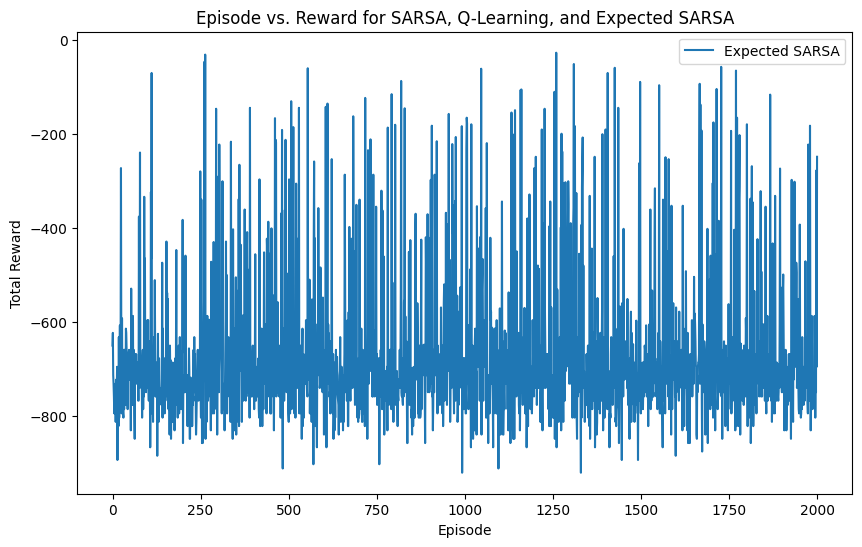

In [ ]:
# Plot episode vs. reward graph
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), rewards_expectedsarsa, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode vs. Reward for SARSA, Q-Learning, and Expected SARSA')
plt.legend()
plt.show()

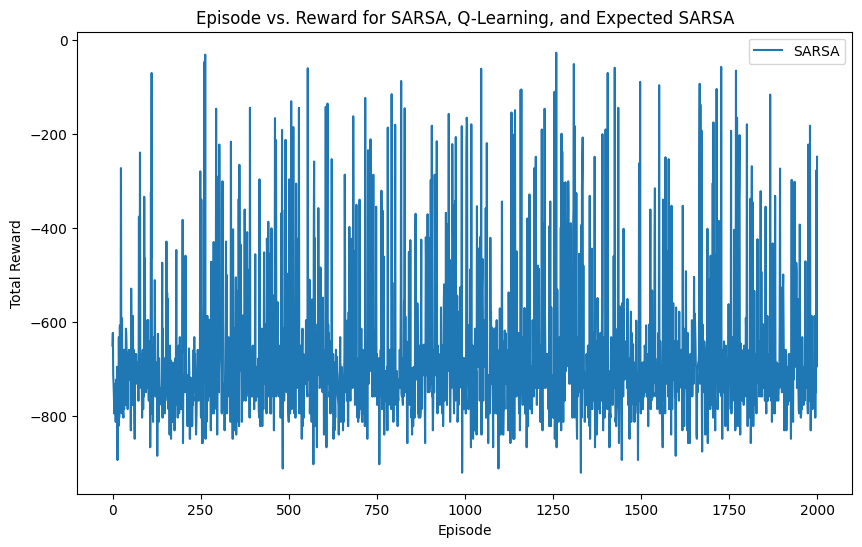

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), rewards_sarsa, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode vs. Reward for SARSA, Q-Learning, and Expected SARSA')
plt.legend()
plt.show()

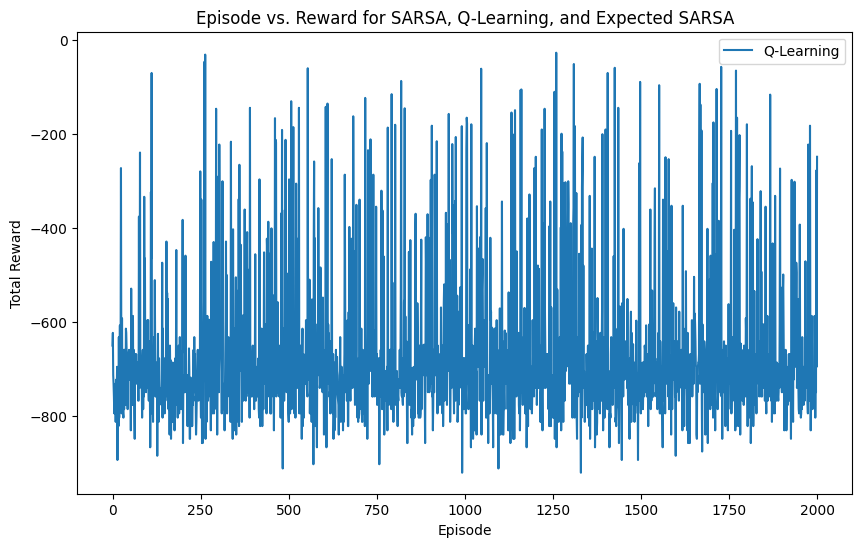

In [ ]:
# Plot episode vs. reward graph
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), rewards_qlearning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode vs. Reward for SARSA, Q-Learning, and Expected SARSA')
plt.legend()
plt.show()